In [1]:
%env SPECTRAL_CONNECTIVITY_ENABLE_GPU=true

env: SPECTRAL_CONNECTIVITY_ENABLE_GPU=true


In [2]:
import os
os.chdir('/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys')


import cupy as xp
from cupyx.scipy.fft import ifft
from cupyx.scipy.sparse.linalg import svds
from spectral_connectivity import Multitaper, Connectivity
import importlib
import pandas as pd
from itertools import combinations
import os
from bidict import bidict
import lfp.lfp_analysis.LFP_collection as LFP_collection

df = pd.read_excel(r"data/rce/rce3_per_subject_channel_mapping.xlsx")
spike_cols = [col for col in df.columns if 'spike_interface_' in col.lower()]

# Extract brain regions from column names
# Assumes format 'spike_interface_REGION'
brain_regions = [col.split('spike_interface_')[1] for col in spike_cols]

# Create nested dictionary
subject_to_channel_dict = {}







for _, row in df.iterrows():
    subject = str(row['Subject'])
    # Initialize inner dictionary for this subject
    subject_to_channel_dict[subject] = {}
    
    # Populate inner dictionary with brain region: spike value pairs
    for col, region in zip(spike_cols, brain_regions):
        subject_to_channel_dict[subject][region] = int(row[col])
behavior_dicts = {}

def make_recording_to_subj_dict(data_path):
    recording_to_subject = {}
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith('merged.rec'):
                subject = str(file.split("_")[-3]).replace('-','.')
                recording_to_subject[file] = subject
                behavior_dicts[file] = {}
    return recording_to_subject




/blue/npadillacoreano/mcum/conda/envs/lfp_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data_path = r"data/rce"
recording_to_subject = make_recording_to_subj_dict(data_path)


In [4]:
collection = LFP_collection.LFPCollection(subject_to_channel_dict, data_path, recording_to_subject, 5)


Processing 20240322_160946_alone_comp_subj_4-4_t5b5_merged.rec
Found first timestamp
Processing 20240322_160946_alone_comp_subj_4-3_t6b6_merged.rec
Found first timestamp
Processing 20240323_165815_alone_comp_subj_4-2_t5b5_merged.rec
Found first timestamp
Processing 20240323_165815_alone_comp_subj_4-4_t6b6_merged.rec
Found first timestamp
Processing 20240320_142408_alone_comp_subj_3-3_t5b5_merged.rec
Found first timestamp
Processing 20240320_142408_alone_comp_subj_3-1_t6b6_merged.rec
Found first timestamp
Processing 20240323_144517_alone_comp_subj_3-4_t6b6_merged.rec
Found first timestamp
Processing 20240323_144517_alone_comp_subj_3-1_t5b5_merged.rec
Found first timestamp
Processing 20240323_122227_alone_comp_subj_5-2_t6b6_merged.rec
Found first timestamp
Processing 20240323_122227_alone_comp_subj_5-3_t5b5_merged.rec
Found first timestamp
Processing 20240320_171038_alone_comp_subj_4-3_t5b5_merged.rec
Found first timestamp
Processing 20240320_171038_alone_comp_subj_4-2_t6b6_merged.rec
Fo

In [5]:
collection.process()

  0%|          | 0/14 [00:00<?, ?it/s]

processing 20240322_160946_alone_comp_subj_4-4_t5b5_merged.rec
RMS Traces calculated
Power Calculated
Coherence calcualatd


Maximum iterations reached. 3960 of 6380 converged
Maximum iterations reached. 4293 of 6380 converged
Maximum iterations reached. 4172 of 6380 converged
Maximum iterations reached. 3904 of 6380 converged
Maximum iterations reached. 2943 of 6380 converged
Maximum iterations reached. 2849 of 6380 converged
Maximum iterations reached. 2702 of 6380 converged
Maximum iterations reached. 3656 of 6380 converged
Maximum iterations reached. 3332 of 6380 converged
Maximum iterations reached. 3698 of 6380 converged
  7%|▋         | 1/14 [00:54<11:47, 54.40s/it]

Granger's causality calculated
processing 20240322_160946_alone_comp_subj_4-3_t6b6_merged.rec
RMS Traces calculated
Power Calculated
Coherence calcualatd


Maximum iterations reached. 6205 of 6381 converged
Maximum iterations reached. 5774 of 6381 converged
Maximum iterations reached. 6232 of 6381 converged
Maximum iterations reached. 6201 of 6381 converged
Maximum iterations reached. 5777 of 6381 converged
Maximum iterations reached. 6169 of 6381 converged
Maximum iterations reached. 6146 of 6381 converged
Maximum iterations reached. 5737 of 6381 converged
Maximum iterations reached. 5710 of 6381 converged
Maximum iterations reached. 6166 of 6381 converged
 14%|█▍        | 2/14 [01:41<10:04, 50.36s/it]

Granger's causality calculated
processing 20240323_165815_alone_comp_subj_4-2_t5b5_merged.rec
RMS Traces calculated
Power Calculated
Coherence calcualatd


Maximum iterations reached. 6379 of 6398 converged
Maximum iterations reached. 6314 of 6398 converged
Maximum iterations reached. 6376 of 6398 converged
Maximum iterations reached. 6354 of 6398 converged
Maximum iterations reached. 6321 of 6398 converged
Maximum iterations reached. 6386 of 6398 converged
Maximum iterations reached. 6365 of 6398 converged
Maximum iterations reached. 6331 of 6398 converged
Maximum iterations reached. 6310 of 6398 converged
Maximum iterations reached. 6360 of 6398 converged
 21%|██▏       | 3/14 [02:30<09:05, 49.61s/it]

Granger's causality calculated
processing 20240323_165815_alone_comp_subj_4-4_t6b6_merged.rec
RMS Traces calculated
Power Calculated
Coherence calcualatd


Maximum iterations reached. 4205 of 6398 converged
Maximum iterations reached. 3776 of 6398 converged
Maximum iterations reached. 4051 of 6398 converged
Maximum iterations reached. 3951 of 6398 converged
Maximum iterations reached. 2817 of 6398 converged
Maximum iterations reached. 2880 of 6398 converged
Maximum iterations reached. 2750 of 6398 converged
Maximum iterations reached. 3008 of 6398 converged
Maximum iterations reached. 2847 of 6398 converged
Maximum iterations reached. 3670 of 6398 converged
 29%|██▊       | 4/14 [03:20<08:18, 49.85s/it]

Granger's causality calculated
processing 20240320_142408_alone_comp_subj_3-3_t5b5_merged.rec
RMS Traces calculated
Power Calculated
Coherence calcualatd


Maximum iterations reached. 4232 of 6358 converged
Maximum iterations reached. 4459 of 6358 converged
Maximum iterations reached. 4525 of 6358 converged
Maximum iterations reached. 4657 of 6358 converged
Maximum iterations reached. 4222 of 6358 converged
Maximum iterations reached. 4256 of 6358 converged
Maximum iterations reached. 4268 of 6358 converged
Maximum iterations reached. 4458 of 6358 converged
Maximum iterations reached. 4507 of 6358 converged
Maximum iterations reached. 4577 of 6358 converged
 36%|███▌      | 5/14 [04:09<07:23, 49.29s/it]

Granger's causality calculated
processing 20240320_142408_alone_comp_subj_3-1_t6b6_merged.rec
RMS Traces calculated
Power Calculated
Coherence calcualatd


Maximum iterations reached. 6197 of 6358 converged
Maximum iterations reached. 5751 of 6358 converged
Maximum iterations reached. 6130 of 6358 converged
Maximum iterations reached. 6266 of 6358 converged
Maximum iterations reached. 5728 of 6358 converged
Maximum iterations reached. 6106 of 6358 converged
Maximum iterations reached. 6221 of 6358 converged
Maximum iterations reached. 5780 of 6358 converged
Maximum iterations reached. 5781 of 6358 converged
Maximum iterations reached. 6161 of 6358 converged
 43%|████▎     | 6/14 [04:55<06:27, 48.38s/it]

Granger's causality calculated
processing 20240323_144517_alone_comp_subj_3-4_t6b6_merged.rec
RMS Traces calculated
Power Calculated
Coherence calcualatd


Maximum iterations reached. 6038 of 6460 converged
Maximum iterations reached. 5446 of 6460 converged
Maximum iterations reached. 6237 of 6460 converged
Maximum iterations reached. 6205 of 6460 converged
Maximum iterations reached. 5463 of 6460 converged
Maximum iterations reached. 6042 of 6460 converged
Maximum iterations reached. 6002 of 6460 converged
Maximum iterations reached. 5433 of 6460 converged
Maximum iterations reached. 5404 of 6460 converged
Maximum iterations reached. 6248 of 6460 converged
 50%|█████     | 7/14 [05:43<05:37, 48.19s/it]

Granger's causality calculated
processing 20240323_144517_alone_comp_subj_3-1_t5b5_merged.rec
RMS Traces calculated
Power Calculated
Coherence calcualatd


Maximum iterations reached. 6285 of 6460 converged
Maximum iterations reached. 6074 of 6460 converged
Maximum iterations reached. 6310 of 6460 converged
Maximum iterations reached. 6387 of 6460 converged
Maximum iterations reached. 5998 of 6460 converged
Maximum iterations reached. 6218 of 6460 converged
Maximum iterations reached. 6284 of 6460 converged
Maximum iterations reached. 6065 of 6460 converged
Maximum iterations reached. 6088 of 6460 converged
Maximum iterations reached. 6319 of 6460 converged
 57%|█████▋    | 8/14 [06:31<04:48, 48.12s/it]

Granger's causality calculated
processing 20240323_122227_alone_comp_subj_5-2_t6b6_merged.rec
RMS Traces calculated
Power Calculated
Coherence calcualatd


Maximum iterations reached. 6298 of 6356 converged
Maximum iterations reached. 6261 of 6356 converged
Maximum iterations reached. 3695 of 6356 converged
Maximum iterations reached. 3573 of 6356 converged
Maximum iterations reached. 6265 of 6356 converged
Maximum iterations reached. 3703 of 6356 converged
Maximum iterations reached. 3577 of 6356 converged
Maximum iterations reached. 3681 of 6356 converged
Maximum iterations reached. 3558 of 6356 converged
Maximum iterations reached. 3387 of 6356 converged
 64%|██████▍   | 9/14 [07:16<03:55, 47.09s/it]

Granger's causality calculated
processing 20240323_122227_alone_comp_subj_5-3_t5b5_merged.rec
RMS Traces calculated
Power Calculated
Coherence calcualatd


Maximum iterations reached. 6100 of 6356 converged
Maximum iterations reached. 2867 of 6356 converged
Maximum iterations reached. 6036 of 6356 converged
Maximum iterations reached. 6051 of 6356 converged
Maximum iterations reached. 2901 of 6356 converged
Maximum iterations reached. 6260 of 6356 converged
Maximum iterations reached. 6286 of 6356 converged
Maximum iterations reached. 2881 of 6356 converged
Maximum iterations reached. 2890 of 6356 converged
Maximum iterations reached. 6236 of 6356 converged
 71%|███████▏  | 10/14 [08:01<03:05, 46.38s/it]

Granger's causality calculated
processing 20240320_171038_alone_comp_subj_4-3_t5b5_merged.rec
RMS Traces calculated
Power Calculated
Coherence calcualatd


Maximum iterations reached. 6115 of 6437 converged
Maximum iterations reached. 5752 of 6437 converged
Maximum iterations reached. 6156 of 6437 converged
Maximum iterations reached. 6186 of 6437 converged
Maximum iterations reached. 5903 of 6437 converged
Maximum iterations reached. 6261 of 6437 converged
Maximum iterations reached. 6274 of 6437 converged
Maximum iterations reached. 5878 of 6437 converged
Maximum iterations reached. 5886 of 6437 converged
Maximum iterations reached. 6325 of 6437 converged
 79%|███████▊  | 11/14 [08:46<02:18, 46.18s/it]

Granger's causality calculated
processing 20240320_171038_alone_comp_subj_4-2_t6b6_merged.rec
RMS Traces calculated
Power Calculated
Coherence calcualatd


Maximum iterations reached. 6250 of 6437 converged
Maximum iterations reached. 4994 of 6437 converged
Maximum iterations reached. 6225 of 6437 converged
Maximum iterations reached. 6213 of 6437 converged
Maximum iterations reached. 5040 of 6437 converged
Maximum iterations reached. 6271 of 6437 converged
Maximum iterations reached. 6270 of 6437 converged
Maximum iterations reached. 5027 of 6437 converged
Maximum iterations reached. 5018 of 6437 converged
Maximum iterations reached. 6234 of 6437 converged
 86%|████████▌ | 12/14 [09:30<01:31, 45.52s/it]

Granger's causality calculated
processing 20240322_120625_alone_comp_subj_3-3_t6b6_merged.rec
RMS Traces calculated
Power Calculated
Coherence calcualatd


Maximum iterations reached. 5360 of 6339 converged
Maximum iterations reached. 5753 of 6339 converged
Maximum iterations reached. 5759 of 6339 converged
Maximum iterations reached. 5802 of 6339 converged
Maximum iterations reached. 5350 of 6339 converged
Maximum iterations reached. 5358 of 6339 converged
Maximum iterations reached. 5336 of 6339 converged
Maximum iterations reached. 5757 of 6339 converged
Maximum iterations reached. 5782 of 6339 converged
Maximum iterations reached. 5778 of 6339 converged
 93%|█████████▎| 13/14 [10:14<00:44, 44.90s/it]

Granger's causality calculated
processing 20240322_120625_alone_comp_subj_3-4_t5b5_merged.rec
RMS Traces calculated
Power Calculated
Coherence calcualatd


Maximum iterations reached. 5716 of 6339 converged
Maximum iterations reached. 5057 of 6339 converged
Maximum iterations reached. 5923 of 6339 converged
Maximum iterations reached. 5937 of 6339 converged
Maximum iterations reached. 5123 of 6339 converged
Maximum iterations reached. 5807 of 6339 converged
Maximum iterations reached. 5795 of 6339 converged
Maximum iterations reached. 5074 of 6339 converged
Maximum iterations reached. 5063 of 6339 converged
Maximum iterations reached. 6079 of 6339 converged
100%|██████████| 14/14 [10:57<00:00, 46.99s/it]

Granger's causality calculated


In [19]:
import pickle 
def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, "rb") as file:
        return pickle.load(file)
    
behavior_dict = unpickle_this('data/rce/recording_startstop_ms.pickle')
beh_dict = {}
for rec_name, times in behavior_dict.items():
    rec_dict = {}
    filename = rec_name +'.rec'
    rec_dict['tone'] = times
    beh_dict[filename] = rec_dict

    


In [21]:
for recording in collection.recordings:
    try:
        recording.set_event_dict(beh_dict[recording.name])
        print(recording.event_dict.keys())
    except KeyError:
        collection.recordings.remove(recording)
        print(f"Removing {recording.name}") 

dict_keys(['tone'])
dict_keys(['tone'])
dict_keys(['tone'])
dict_keys(['tone'])
dict_keys(['tone'])
dict_keys(['tone'])
dict_keys(['tone'])
dict_keys(['tone'])
dict_keys(['tone'])
dict_keys(['tone'])
dict_keys(['tone'])


/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/plotting.py:77: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(np.array(averages), axis=0)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/plotting.py:80: SmallSampleWarning: After omitting NaNs, one or more axis-slices of one or more sample arguments is too small; corresponding elements of returned arrays will be NaN. See documentation for sample size requirements.
  event_sem = stats.sem(averages, axis=0, nan_policy="omit")


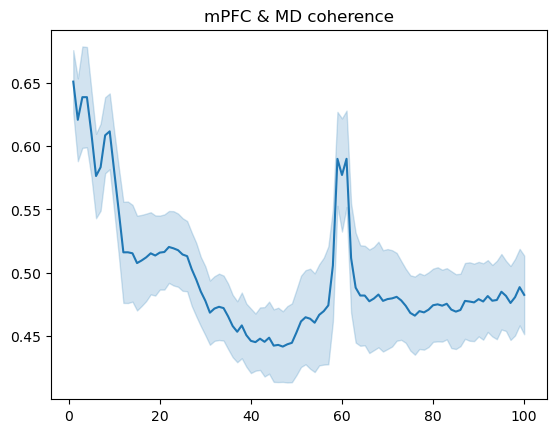

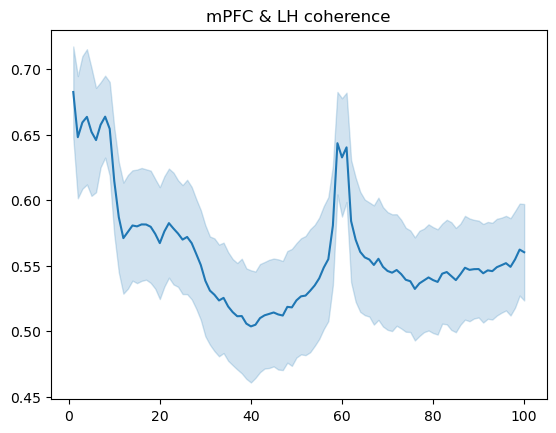

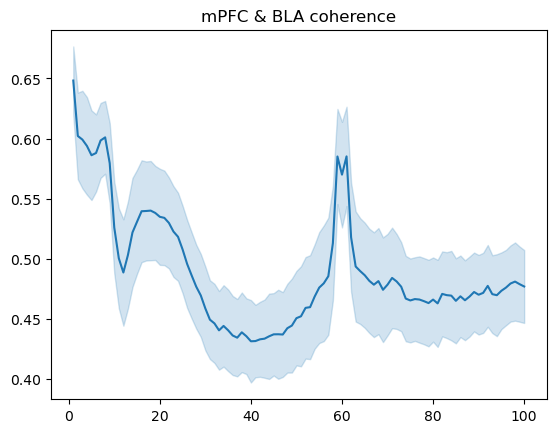

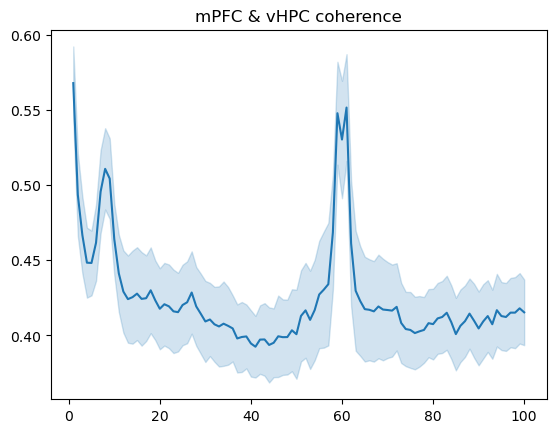

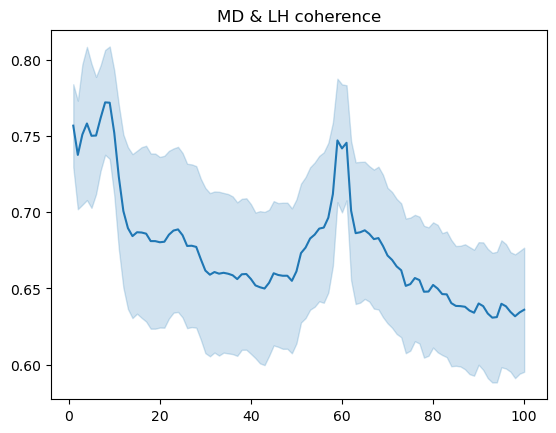

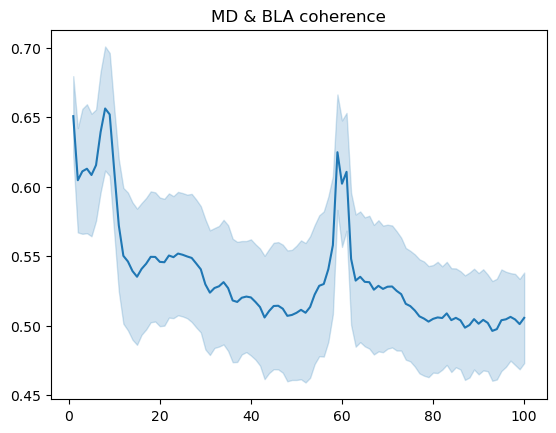

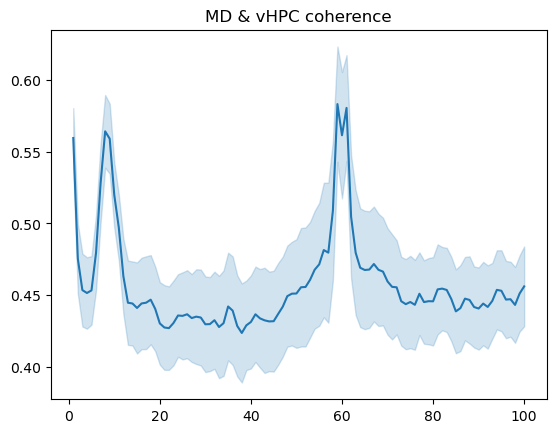

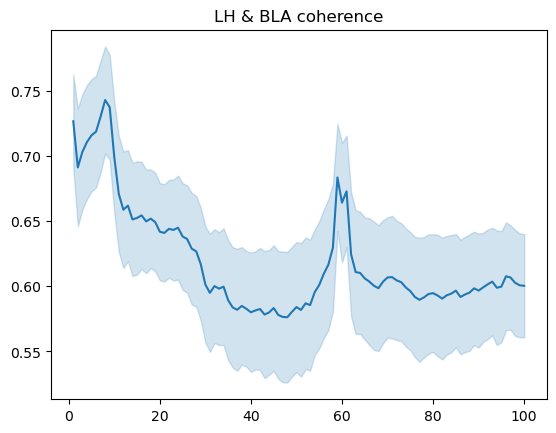

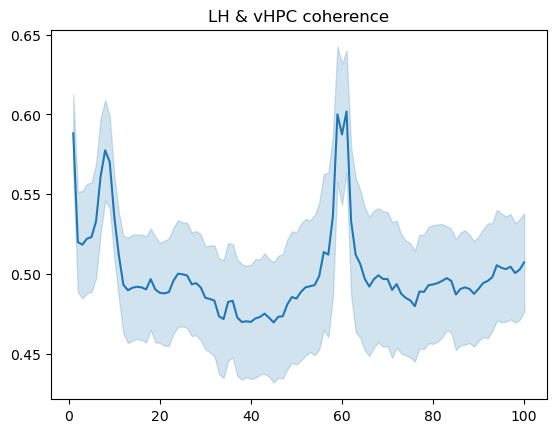

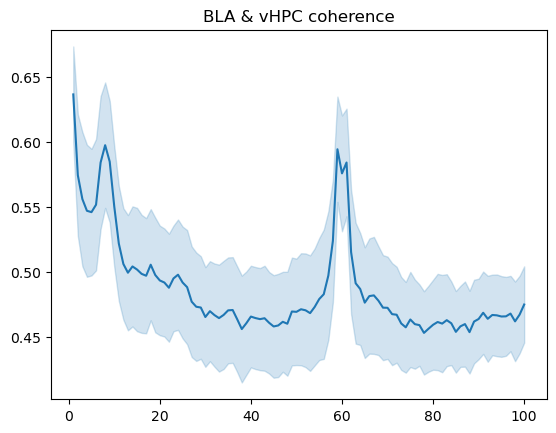

In [23]:
import lfp.lfp_analysis.plotting as lfplt
import lfp.lfp_analysis.event_extraction as ee
events = ['tone']

coherence_average = ee.average_events(collection, events = events, mode = 'coherence')
lfplt.plot_coherence_spectrum(collection, coherence_average)